In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Preparing Dataset

In [6]:
df = pd.DataFrame(boston.data,columns = boston.feature_names)
df['Target_Price'] = boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


describe() is not for categorical features.

Basic things need to be done before modeling:
    
    -> Check for missing values
    -> Exploratory data anaysis

# Checking missing values

isnull() -> will return boolean values in tabular format.


isnull().sum() -> aggregate function to display the count of missing values in each column.

In [9]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
Target_Price    0
dtype: int64

So, there are no missing values.

# Checking Correlation

 df.corr()

Default method is pearson.

Pearson checks the correlation for two attributes, whether they are positively corelated or negatively corelated.

Or in between.

Value ranges from -1 to +1

-> Check corelation for independent vs independent. If closer to 1 or -1, remove any one of the attribute. (Multicolinearity)

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


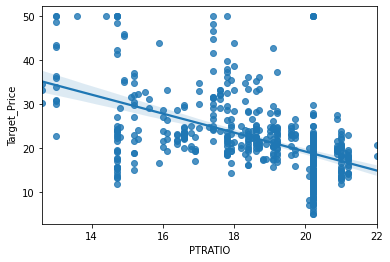

In [12]:
import seaborn as sns
sns.regplot(x="PTRATIO",y="Target_Price",data=df)

As the Pupil-Teacher Ration increases, Price of the House decreases. (Inversely corelated)

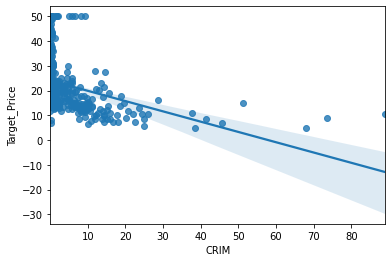

In [13]:
sns.regplot(x="CRIM",y="Target_Price",data=df)

Text(0, 0.5, 'House Price')

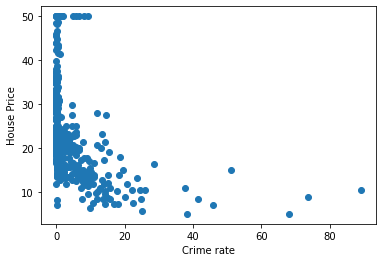

In [14]:
plt.scatter(df['CRIM'],df['Target_Price'])
plt.xlabel("Crime rate")
plt.ylabel("House Price")

Crime rate increases, Price decreases

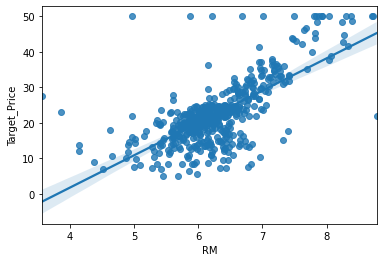

In [15]:
sns.regplot(x="RM",y="Target_Price",data=df)

As number of rooms increases, price also increases (Positively corelated)

In [ ]:
sns.pairplot(df)

Completed Analysis.

Lets start to build model.

Splitting into dependent and independent features


In [ ]:
X= df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] #target/dependent feature

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

why standard scaler?

       internally it works on gradient descent, main aim is to come to near global minima. In order to do that,
    all our independent features should be in the same scale. so that conversions can be made faster.

In [ ]:
X_train

In [ ]:
X_test

# Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
reg_predict = regressor.predict(X_test)

In [ ]:
plt.scatter(reg_predict,y_test)

When the predicted value and the test value are in linear, this is the indication that our model is somewhat doing better calculations.

In [ ]:
residuals = reg_predict-y_test
#sns.displot(residuals,kind="kde")

In [ ]:
plt.scatter(reg_predict,residuals)

They are uniformly distributed, so this is also another indication.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(reg_predict,y_test)
mae = mean_absolute_error(reg_predict,y_test)
rmse = np.sqrt(mean_squared_error(reg_predict,y_test))

In [ ]:
print(mse)
print(mae)
print(rmse)

# R Square

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict,y_test)
print(score)

more closer to 1, good the prediction is.

# Prediction for new data

In [ ]:
newdat = boston.data[0].reshape(1,-1)
stand = scaler.transform(newdat)
regressor.predict(stand)

# Model file

In [ ]:
import pickle

In [ ]:
pickle.dump(regressor,open("regresmodel.pkl","wb"))

In [ ]:
pickled_model = pickle.load(open("regresmodel.pkl","rb"))

In [ ]:
pickled_model.predict(stand)